使用 Human Activity Recognition with Smartphones数据集，根据手机传感器的数据预测动作（走路、上楼、下楼、坐着、站着、躺着））

dataset提供：

•来自加速度计的三轴加速度（总加速度）和估计的身体加速度。

•来自陀螺仪的三轴角速度。

• 具有时域和频域变量的 561 个特征向量。

•它的活动标签。

In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
data_path = [ 'dataset']
filepath = os.sep.join(data_path + ['Human_Activity_Recognition_Using_Smartphones_Data.csv'])
data = pd.read_csv(filepath, sep=',')#加载数据


In [2]:
#数据列除标签外均为数值类型
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [3]:
data.dtypes.tail()#查看最后五列数据

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

数据都按比例从 -1（最小值）到 1.0（最大值）。（不用缩放了）

In [4]:

data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [5]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

In [6]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

Scikit 学习分类器不接受预测列的稀疏矩阵。
因此，要么需要使用 LabelEncoder 将活动标签转换为整数，要么如果使用 DictVectorizer，则必须将生成的矩阵转换为非稀疏数组。

使用 LabelEncoder 对“Activity”列进行 fit_transform，并查看 5 个随机值。

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

2585    1
4829    4
3112    1
6348    0
4974    0
Name: Activity, dtype: int32

In [8]:
data.Activity.value_counts()

0    1944
2    1906
1    1777
3    1722
5    1544
4    1406
Name: Activity, dtype: int64

- 计算因变量之间的相关性。
- 创建相关值的直方图 
- 识别最相关（正相关或负相关）的列。

In [9]:
#计算相关值
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

In [10]:
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,0.004590,-0.046352,-0.024185,1.000000,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,-0.016785,-0.046996,-0.023745,0.922525,1.000000,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.036047,0.013241,-0.066233,0.027464,0.001902,-0.004984,0.027729,-0.002924,-0.009873,0.033533,...,-0.029273,0.042123,0.035684,-0.013009,0.010679,1.000000,-0.112454,-0.007095,-0.006444,-0.015380
"angle(tBodyGyroJerkMean,gravityMean)",0.034296,0.077627,-0.030748,-0.027123,-0.015784,-0.012196,-0.027097,-0.013411,-0.012800,-0.030908,...,-0.002618,-0.013065,-0.011829,-0.027478,0.023605,-0.112454,1.000000,0.024822,-0.004582,-0.012549
"angle(X,gravityMean)",-0.041021,-0.007513,0.003215,-0.374104,-0.381391,-0.353271,-0.371168,-0.378013,-0.355836,-0.384244,...,0.087571,-0.085226,-0.081971,0.008050,0.017534,-0.007095,0.024822,1.000000,-0.748249,-0.635231
"angle(Y,gravityMean)",0.034053,-0.005616,-0.012986,0.449425,0.506106,0.459092,0.444926,0.507947,0.460345,0.458832,...,-0.105752,0.087671,0.078010,0.003082,-0.007256,-0.006444,-0.004582,-0.748249,1.000000,0.545614


In [11]:
#通过清空对角线以下的所有数据来简化
tril_index = np.tril_indices_from(corr_values)

# 没用的值设置为 NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
#stack()实现输入数个数组不同方式的堆叠，返回堆叠后的1个数组。stack()会增加数组的维度
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))
#使用set_names可以将 index 中的名称进行更改

#获取排序后的绝对值
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [12]:
# corr_values.stack().to_frame()# series --> dataframe 

In [13]:
# corr_values.stack().to_frame().reset_index()

绝对值的直方图

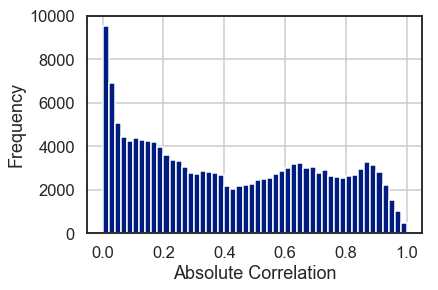

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

ax = corr_values.abs_correlation.hist(bins=50)

ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [15]:
#相关性最强的值
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


- 将数据拆分为训练和测试数据集。可以使用任何方法完成，但请考虑使用 Scikit-learn 的 StratifiedShuffleSplit 来保持相同的预测类比率。
- 不管使用什么方法来分割数据，比较训练和测试分割中的类比例

from  sklearn.model_selection import StratifiedShuffleSplit
StratifiedShuffleSplit(n_splits=10,test_size=None,train_size=None, random_state=None)

参数 n_splits是将训练数据分成train/test对的组数，可根据需要进行设置，默认为10

函数作用描述

1.其产生指定数量的独立的train/test数据集划分数据集划分成n组。

2.首先将样本随机打乱，然后根据设置参数划分出train/test对。

3.其创建的每一组划分将保证每组类比比例相同。即第一组训练数据类别比例为2:1，则后面每组类别都满足这个比例

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit


#获取拆分后的索引 
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# 创建dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [17]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [18]:
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

- 使用所有特征拟合（没有任何正则化操作）逻辑回归模型。存储模型。
- 使用交叉验证来确定超参数，使用 L1 和 L2 正则化拟合模型。还要存储这些模型中的每一个。
请注意多分类模型、求解器和正则化的限制。
正则化模型，尤其是 L1 模型，可能需要一段时间才能适应


算力有限，以下不便运算

In [19]:
from sklearn.linear_model import LogisticRegression

# 标准的logistic回归
lr = LogisticRegression(max_iter = 5).fit(X_train, y_train )#默认为1000。

H:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
X_train.shape

(7209, 561)

In [21]:
1

1

In [22]:
from sklearn.linear_model import LogisticRegressionCV
LogisticRegressionCV?

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# L1  正则化logistic回归
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear',max_iter = 5).fit(X_train, y_train)

参数优化方式：solver  
当penalty为l1的时候，参数只能是：liblinear(坐标轴下降法)，lbfgs和cg都是关于目标函数的二阶泰勒展开,当penalty为l2的时候，参数可以是：lbfgs(拟牛顿法)、newton-cg(牛顿法变种)，  sag(minibatch) 、而liblinear通吃L1正则化和L2正则化     

维度<10000时，lbfgs法比较好，维度>10000时cg法比较好，显卡计算的时候，lbfgs和cg都比seg快

1. liblinear：使用了坐标轴下降法来迭代优化损失函数。

2. lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。

3. newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。

4. sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候，SAG是一种线性收敛算法，这个速度远比SGD快。关于SAG的理解.


参考：https://blog.csdn.net/wangyuhao07/article/details/86152183

In [ ]:
#使用不同的solvers参数 ‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’ 并观察
lr_l1_test = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='saga',max_iter = 5).fit(X_train, y_train)
#Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

H:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
# L2 正则化logistic回归
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2').fit(X_train, y_train)

比较每个模型的系数大小。
如果使用 one-vs-rest 拟合，则可以单独绘制每组系数

In [ ]:
# 结合所有系数到dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 labels=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

为每个多类系数准备六个单独的图

In [ ]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)


for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()


- 预测并存储每个模型的类。
- 存储每个模型的预测类的概率

In [ ]:
# 预测每一条数据对应类别和概率

y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()


In [ ]:
y_prob.head()

对于每个模型，计算以下误差度量：
- accuracy 

- precision 

- recall

- fscore 

- 混淆矩阵 

决定如何将多分类度量合并为每个模型的单个值

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)
metrics

展示混淆矩阵

In [ ]:

fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()


在构建模型之前识别高度相关的列并删除这些列

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

#threshold= 0.7

sel = VarianceThreshold(threshold=(.7 * (1 - .7)))

data2 = pd.concat([X_train,X_test])
data_new = pd.DataFrame(sel.fit_transform(data2))


data_y = pd.concat([y_train,y_test])

from sklearn.model_selection import train_test_split

X_new,X_test_new = train_test_split(data_new)
Y_new,Y_test_new = train_test_split(data_y)

使用标准, L1 和 L2 Logistic 回归

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# L1  正则化logistic回归
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_new, Y_new)

In [ ]:
#使用不同的solvers参数 ‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’ 并观察
# lr_l1_test = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='newton-cg').fit(X_train, y_train)


In [89]:
# L2 正则化logistic回归
lr_l2 = LogisticRegressionCV(max_iter=1000,Cs=10, cv=4, penalty='l2').fit(X_new, Y_new)

H:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

In [ ]:
。。。